In [2]:
import os
import pandas as pd
import sys
import seaborn as sns
import numpy as np
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import scipy.stats as stats
from sodapy import Socrata


path = os.path.abspath('')


https://opendata.fcc.gov/resource/hicn-aujz.json

https://opendata.fcc.gov/Wireline/Fixed-Broadband-Deployment-Data-December-2020/hicn-aujz

In [3]:
#Load raw data
fcc_path = path+'\\static-data\\Fixed_Broadband_Deployment_Data__December_2020.csv'

fcc_data = pd.read_csv(fcc_path)

#Filter consumer plans only
fcc_data = fcc_data[fcc_data['Consumer'] == 1.0]

fcc_data[:20]

C:\Users\Jude\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\IPython\core\interactiveshell.py:3251: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Logical Record Number,Provider ID,FRN,Provider Name,DBA Name,Holding Company Name,Holding Company Number,Holding Company Final,State,Census Block FIPS Code,Technology Code,Consumer,Max Advertised Downstream Speed (mbps),Max Advertised Upstream Speed (mbps),Business
0,9472563,70592.0,4963088.0,"ViaSat, Inc.",Viasat Inc,"ViaSat, Inc.",290111.0,"ViaSat, Inc.",MD,2.403788e+14,60.0,1.0,35.0,3.0,1.0
1,9472564,70592.0,4963088.0,"ViaSat, Inc.",Viasat Inc,"ViaSat, Inc.",290111.0,"ViaSat, Inc.",MD,2.403788e+14,60.0,1.0,35.0,3.0,1.0
2,9472565,70592.0,4963088.0,"ViaSat, Inc.",Viasat Inc,"ViaSat, Inc.",290111.0,"ViaSat, Inc.",MD,2.403788e+14,60.0,1.0,35.0,3.0,1.0
3,9472566,70592.0,4963088.0,"ViaSat, Inc.",Viasat Inc,"ViaSat, Inc.",290111.0,"ViaSat, Inc.",MD,2.403788e+14,60.0,1.0,35.0,3.0,1.0
4,9472567,70592.0,4963088.0,"ViaSat, Inc.",Viasat Inc,"ViaSat, Inc.",290111.0,"ViaSat, Inc.",MD,2.403788e+14,60.0,1.0,35.0,3.0,1.0
5,9472568,70592.0,4963088.0,"ViaSat, Inc.",Viasat Inc,"ViaSat, Inc.",290111.0,"ViaSat, Inc.",MD,2.403788e+14,60.0,1.0,35.0,3.0,1.0
6,9472569,70592.0,4963088.0,"ViaSat, Inc.",Viasat Inc,"ViaSat, Inc.",290111.0,"ViaSat, Inc.",MD,2.403788e+14,60.0,1.0,35.0,3.0,1.0
7,9472570,70592.0,4963088.0,"ViaSat, Inc.",Viasat Inc,"ViaSat, Inc.",290111.0,"ViaSat, Inc.",MD,2.403788e+14,60.0,1.0,35.0,3.0,1.0
8,9472571,70592.0,4963088.0,"ViaSat, Inc.",Viasat Inc,"ViaSat, Inc.",290111.0,"ViaSat, Inc.",MD,2.403788e+14,60.0,1.0,35.0,3.0,1.0
9,9472572,70592.0,4963088.0,"ViaSat, Inc.",Viasat Inc,"ViaSat, Inc.",290111.0,"ViaSat, Inc.",MD,2.403788e+14,60.0,1.0,35.0,3.0,1.0


In [4]:
#2-digit code indicating the Technology of Transmission used to offer broadband service. 10=Asymetrical xDSL | 11=ADSL2 | 12=VDSL | 20=Symetrical xDSL | 30=Other Copper Wireline | 40=Cable Modem | 41=Cable Modem-DOCSIS1,1.1, and 2.0 | 42=Cable Modem-DOCSIS 3.0 | 43=Cable Modem-DOCSIS 3.1 | 50=Optical Carrier/Fiber to the End User | 60=Satellite | 70=Terrestrial Fixed Wireless | 90=Electric Power Line | 0=All Other

threshold = 50

tech_codes = {
    10: 'Asymetrical xDSL',
    11: 'ADSL 2.0',
    12: 'VDSL',
    20: 'Symetrical xDSL',
    30: 'Other Copper Wireline',
    40: 'Cable Modem DOCSIS 1, 1.1, 2.0',
    42: 'Cable Modem DOCSIS 3.0',
    43: 'Cable Model DOCSIS 3.1',
    50: 'Optical/Fiber to End User',
    60: 'Satelite',
    70: 'Terrestrial Fixed Wireless',
    90: 'Electric Power Line',
    0: 'Other'
}

#Cable, fiberoptic or DSL|Cellular|Satelite|Dialup
CFD = [10.0,11.0,12.0,20.0,30.0,40.0,42.0,43.0,50.0]
Cell = [70.0]
Sat = [60.0]

fast_net = fcc_data[fcc_data['Max Advertised Downstream Speed (mbps)'] >= threshold]

fast_net = fast_net.groupby('Technology Code').count()

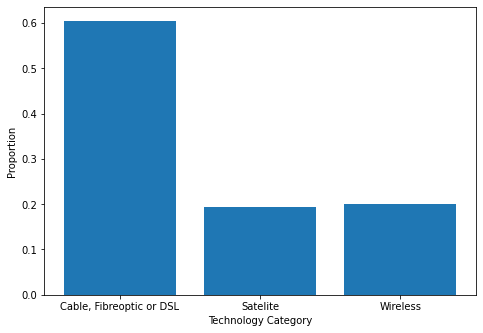

In [33]:
sum = fast_net.sum()[0]
CFDsum = fast_net[fast_net.index.isin(CFD)].sum()[0]/sum
CellSum = fast_net[fast_net.index.isin(Cell)].sum()[0]/sum
SatSum = fast_net[fast_net.index.isin(Sat)].sum()[0]/sum

sums = {
    'Counts': [CFDsum,SatSum,CellSum] 
}

countdf = pd.DataFrame(sums,index=['Cable, Fibreoptic or DSL','Satelite','Wireless'])

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(countdf.index, countdf.Counts.values)
ax.set_xlabel('Technology Category')
ax.set_ylabel('Proportion')
plt.show()

In [ ]:
#Only keep the highest down speed for each census block
highestRows = fcc_data.groupby('Census Block FIPS Code')['Max Advertised Downstream Speed (mbps)'].max().reset_index()

#Stringify fips code, remove decimals
highestRows['Census Block FIPS Code'] = highestRows['Census Block FIPS Code'].astype(str)

highestRows['Census Block FIPS Code'] = highestRows['Census Block FIPS Code'].str[:-2]

highestRows[:20]

,Census Block FIPS Code,Max Advertised Downstream Speed (mbps)
0,10010201001000,1000.0
1,10010201001001,940.0
2,10010201001002,940.0
3,10010201001003,940.0
4,10010201001004,940.0
5,10010201001005,940.0
6,10010201001006,940.0
7,10010201001007,940.0
8,10010201001008,940.0
9,10010201001009,25.0


In [ ]:
print(np.shape(highestRows))

#Additional Columns to split state, county, tract, block
highestRows['tract fips'] = highestRows['Census Block FIPS Code'].str[:-3]
highestRows['block'] = highestRows['Census Block FIPS Code'].str[-3:]
highestRows['tract'] = highestRows['Census Block FIPS Code'].str[-10:-4]
highestRows['county'] = highestRows['Census Block FIPS Code'].str[-13:-10]
highestRows['state'] = highestRows['Census Block FIPS Code'].str[:-13]

highestRows.drop(['Census Block FIPS Code'],axis=1,inplace=True)

#Only states, exclude territories
highestRows = highestRows[highestRows['state'].astype(int) < 57]


highestRows[:10]

(11048189, 2)


,Max Advertised Downstream Speed (mbps),tract fips,block,tract,county,state
0,1000.0,10010201001,000,020100,001,1
1,940.0,10010201001,001,020100,001,1
2,940.0,10010201001,002,020100,001,1
3,940.0,10010201001,003,020100,001,1
4,940.0,10010201001,004,020100,001,1
5,940.0,10010201001,005,020100,001,1
6,940.0,10010201001,006,020100,001,1
7,940.0,10010201001,007,020100,001,1
8,940.0,10010201001,008,020100,001,1
9,25.0,10010201001,009,020100,001,1


In [ ]:
#Get percentage access
percent_access = np.divide(highestRows['Max Advertised Downstream Speed (mbps)'].ge(50).groupby(highestRows['tract fips']).sum(), highestRows['Max Advertised Downstream Speed (mbps)'].groupby(highestRows['tract fips']).count())
highestRows = highestRows.join(pd.DataFrame(percent_access), on='tract fips', rsuffix='x')
highestRows.rename(columns={'Max Advertised Downstream Speed (mbps)x':'Percentage Access'}, inplace=True)
highestRows[:10]

,Max Advertised Downstream Speed (mbps),tract fips,block,tract,county,state,Percentage Access
0,1000.0,10010201001,000,020100,001,1,0.964286
1,940.0,10010201001,001,020100,001,1,0.964286
2,940.0,10010201001,002,020100,001,1,0.964286
3,940.0,10010201001,003,020100,001,1,0.964286
4,940.0,10010201001,004,020100,001,1,0.964286
5,940.0,10010201001,005,020100,001,1,0.964286
6,940.0,10010201001,006,020100,001,1,0.964286
7,940.0,10010201001,007,020100,001,1,0.964286
8,940.0,10010201001,008,020100,001,1,0.964286
9,25.0,10010201001,009,020100,001,1,0.964286


In [ ]:
tracts = highestRows.groupby(['state','county','tract'])['Max Advertised Downstream Speed (mbps)','Percentage Access'].median().reset_index()

C:\Users\Jude\AppData\Local\Temp\ipykernel_13164\3476254572.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  tracts = highestRows.groupby(['state','county','tract'])['Max Advertised Downstream Speed (mbps)','Percentage Access'].median().reset_index()


In [ ]:
tracts[:10]

,state,county,tract,Max Advertised Downstream Speed (mbps),Percentage Access
0,1,001,020100,940.0,0.967742
1,1,001,020200,1000.0,1.000000
2,1,001,020300,1000.0,1.000000
3,1,001,020400,1000.0,1.000000
4,1,001,020500,1000.0,1.000000
5,1,001,020600,940.0,1.000000
6,1,001,020700,940.0,1.000000
7,1,001,020801,940.0,0.959184
8,1,001,020802,940.0,1.000000
9,1,001,020900,100.0,1.000000


In [ ]:
#Save Tracts
save_path = path+'\\static-data\\cleaned_fcc_tracts.csv'

tracts.to_csv(save_path)